In [7]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Create a Spotify client using manual login method
sp_oauth = SpotifyOAuth(
    client_id="d129c64e43194357879573996a1f5a99",
    client_secret="caff1e3ee2104b55845fb0a445d08f1b",
    redirect_uri="http://127.0.0.1:8080/callback",
    scope="user-top-read",
    open_browser=False
)

# Get the authorization URL and print it
auth_url = sp_oauth.get_authorize_url()
print("Please go to this URL and authorize access:")
print(auth_url)

# Ask user to paste the URL they get redirected to
redirect_response = input("\nPaste the full redirect URL here: ")

# Extract token using the URL
code = sp_oauth.parse_response_code(redirect_response)
token_info = sp_oauth.get_access_token(code)
access_token = token_info['access_token']

# Create Spotipy client with token
sp = spotipy.Spotify(auth=access_token)

# Get your top 10 tracks
top_tracks = sp.current_user_top_tracks(limit=10)

# Print them
print("\n🎵 Your Top Tracks:")
for idx, item in enumerate(top_tracks['items']):
    print(f"{idx + 1}. {item['name']} by {item['artists'][0]['name']}")


Please go to this URL and authorize access:
https://accounts.spotify.com/authorize?client_id=d129c64e43194357879573996a1f5a99&response_type=code&redirect_uri=http%3A%2F%2F127.0.0.1%3A8080%2Fcallback&scope=user-top-read



Paste the full redirect URL here:  http://127.0.0.1:8080/callback?code=AQABP78KcU930V6tPzqAc6tWtI78dxDcuhn6-gj7K-YQZHxmM6QzCEgZPychjGdb90W-AxbIDGYTauw35-kizSm4yf6jnV4uFx0XtEg1cyFFXtBdLn6erAhnioaztVx77xKmlOW5TrVt86tCoOZZL0pkWh_yN7s67zAC4980dFUWMrC6Npp0rhhYzCrSmFNfoQ


C:\Users\DELL\AppData\Local\Temp\ipykernel_2220\221676699.py:23: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token_info = sp_oauth.get_access_token(code)



🎵 Your Top Tracks:


In [9]:
top_tracks = sp.current_user_top_tracks(limit=10)
top_tracks = sp.current_user_top_tracks(limit=10, time_range='long_term')

print(top_tracks)


{'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7nqOGRxlXj7N2JYbgNEjYH'}, 'href': 'https://api.spotify.com/v1/artists/7nqOGRxlXj7N2JYbgNEjYH', 'id': '7nqOGRxlXj7N2JYbgNEjYH', 'name': 'SEVENTEEN', 'type': 'artist', 'uri': 'spotify:artist:7nqOGRxlXj7N2JYbgNEjYH'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BT', 'BW', 'BF', 'CV', 

In [10]:
import pandas as pd

# Extract relevant info
track_data = [{
    'Name': item['name'],
    'Artist': item['artists'][0]['name'],
    'Album': item['album']['name'],
    'Popularity': item['popularity']
} for item in top_tracks['items']]

# Create DataFrame
df = pd.DataFrame(track_data)
print(df)


                       Name     Artist  \
0                 VERY NICE  SEVENTEEN   
1              God of Music  SEVENTEEN   
2  The Reasons of My Smiles        BSS   
3                       HOT  SEVENTEEN   
4                     Super  SEVENTEEN   
5                    CHEERS  SEVENTEEN   
6               double take      Dhruv   
7                     Rover        KAI   
8                      I AM        IVE   
9     Gangnam Style (강남스타일)        PSY   

                                               Album  Popularity  
0                        Love&Letter repackage album          71  
1     SEVENTEEN 11th Mini Album 'SEVENTEENTH HEAVEN'          68  
2  Queen of Tears (Original Television Soundtrack...          66  
3                 SEVENTEEN 4th Album 'Face the Sun'          73  
4                    SEVENTEEN 10th Mini Album 'FML'          69  
5          SEVENTEEN 4th Album Repackage 'SECTOR 17'          66  
6                                        double take          75  
7

In [27]:
print(df);


                       Name     Artist  \
0                 VERY NICE  SEVENTEEN   
1              God of Music  SEVENTEEN   
2  The Reasons of My Smiles        BSS   
3                       HOT  SEVENTEEN   
4                     Super  SEVENTEEN   
5                    CHEERS  SEVENTEEN   
6               double take      Dhruv   
7                     Rover        KAI   
8                      I AM        IVE   

                                               Album  Popularity  
0                        Love&Letter repackage album          71  
1     SEVENTEEN 11th Mini Album 'SEVENTEENTH HEAVEN'          68  
2  Queen of Tears (Original Television Soundtrack...          66  
3                 SEVENTEEN 4th Album 'Face the Sun'          73  
4                    SEVENTEEN 10th Mini Album 'FML'          69  
5          SEVENTEEN 4th Album Repackage 'SECTOR 17'          66  
6                                        double take          75  
7                         Rover - The 3rd M

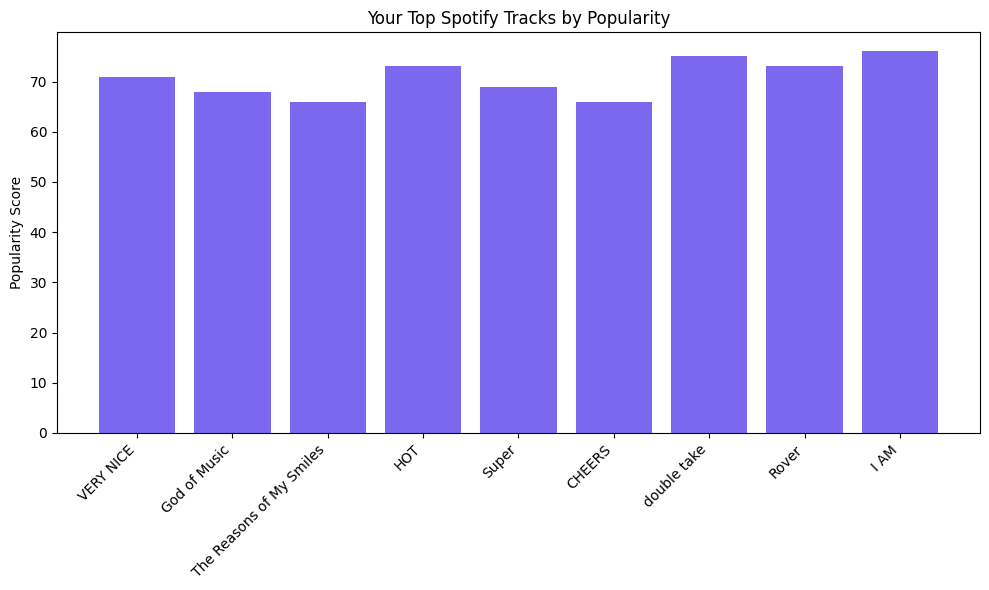

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df['Name'], df['Popularity'], color='mediumslateblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Popularity Score')
plt.title('Your Top Spotify Tracks by Popularity')
plt.tight_layout()
plt.show()


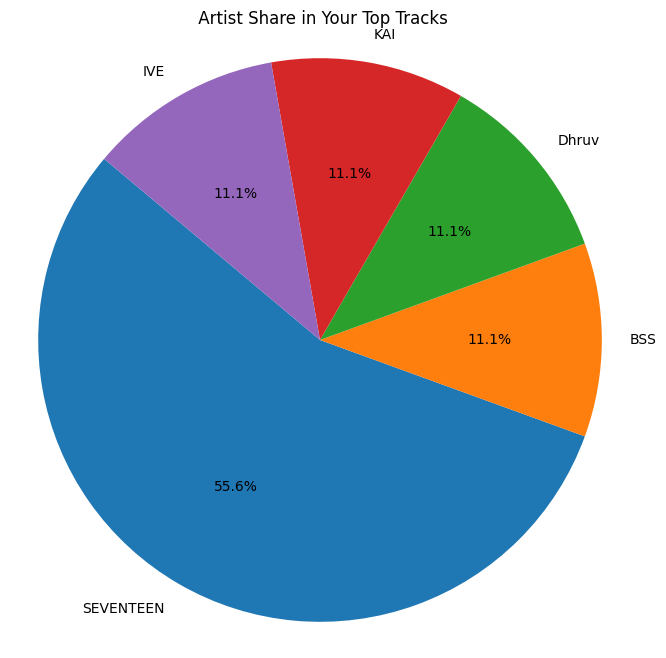

In [32]:
artist_counts = df['Artist'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(artist_counts, labels=artist_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(" Artist Share in Your Top Tracks")
plt.axis('equal')
plt.show()


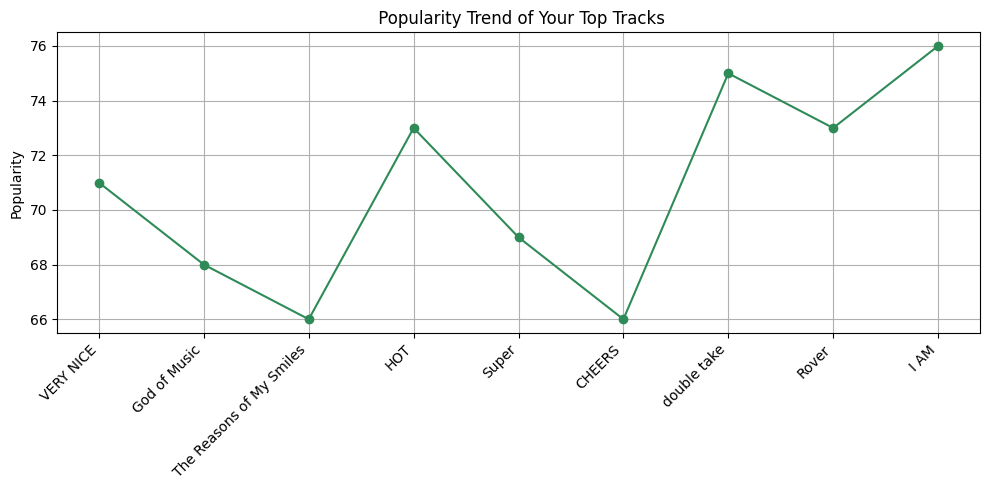

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(df['Name'], df['Popularity'], marker='o', linestyle='-', color='seagreen')
plt.xticks(rotation=45, ha='right')
plt.title(" Popularity Trend of Your Top Tracks")
plt.ylabel("Popularity")
plt.grid(True)
plt.tight_layout()
plt.show()


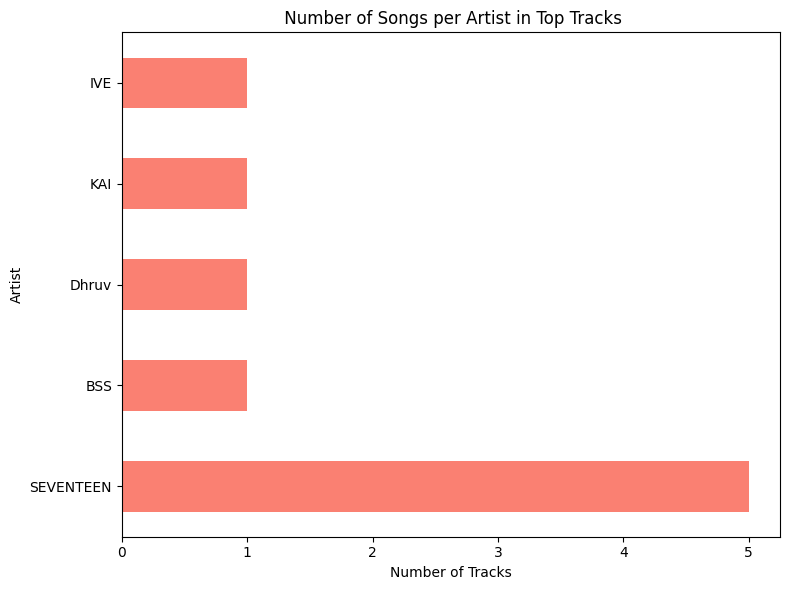

In [36]:
plt.figure(figsize=(8, 6))
artist_counts.plot(kind='barh', color='salmon')
plt.title(" Number of Songs per Artist in Top Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()


In [37]:
# Save the cleaned dataframe to CSV
df.to_csv("your_spotify_top_tracks.csv", index=False)
